<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/results/A3_evaluation_02_01_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)
print('cuda: ', torch.cuda.is_available())

2.1.0+cu121
cuda:  True


In [ ]:
! pip install rdkit --quiet
! pip install PyTDC --quiet
! pip install mycolorpy --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet
! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet


In [3]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [4]:
from scripts.func_utils import make_path, convert_with_qed_sa, get_min, \
                                plot_loss, plot_performance

from scripts.eval_utils import *
from scripts.preprocess_mols import *
from scripts.model_architecture import *
from scripts.dataset import *
from scripts.train import *
import yaml
import pandas as pd
from scripts.get_vocab import *

from tdc.single_pred import ADME
from tdc.single_pred import Tox
from scripts.CONSTANT import *
from scripts.yaml_utils import *

print('VOCAB TYPE:', VOCAB_TYPE)

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
VOCAB TYPE: smiles


In [5]:
from scripts.TRAIN import *

# A3 results, Single Task for 3 absorption tasks

## one model per task
['PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']

---



In [6]:
names_A3

['PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']

In [12]:
print('single task evaluation on different models\n')
best_model_dict = {}
for name in names_A3:
    model_dict = {}
    print('Evaluating ', name)
    folder_name = f'ST/{name}/'
    for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
        print('\n', '='*30, model_type, '='*30)
        perfs = []
        for i in range(3):
            file_name = folder_name + model_type + '_ST_' + str(i) + '.yml'
            p = yml_report(file_name, recalculate=False)
            perfs.append(p)
        best_idx = eval_perf_list(perfs, name)
        model_dict[model_type] = best_idx
    best_model_dict[name] = model_dict
    print('\n\n')

single task evaluation on different models

Evaluating  PAMPA_NCATS

 ============================== MLP ==============================
repeated num # 3 idx 1 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       auc      |       ap      
	&0.852$\pm$0.005  &0.764$\pm$0.009  &0.940$\pm$0.005  
 idx 1: &0.855            &0.777            &0.946            


 ============================== AttentiveFP ==============================
repeated num # 3 idx 2 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       auc      |       ap      
	&0.841$\pm$0.008  &0.750$\pm$0.002  &0.925$\pm$0.003  
 idx 2: &0.837            &0.751            &0.922            


 ============================== GIN ==============================
repeated num # 3 idx 2 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       auc      |       ap      
	&0.869$\pm$0.002  &0.778$\pm$

Found local copy...
Loading...
Done!


Best model performance among each algorithm, generate figures

Evaluating  PAMPA_NCATS

 ============================== MLP ==============================
The 1th run
collect data for:  ['PAMPA_NCATS']
--> preparing data loader for model type  MLP
---> converting SMILES to MACCS...
---> FINISHED
Model type:  MLP | Model parameters:  32385
finish load data status 

load pretrained model from  ST/PAMPA_NCATS/MLP_ST_1.pt
[Test] Loss: 0.371
*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.855  &0.584  &0.868  &0.977  &0.190  &0.919 &0.777 &0.280 &0.946


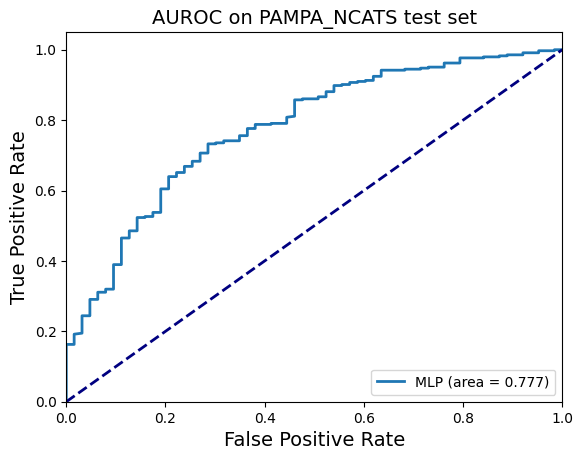

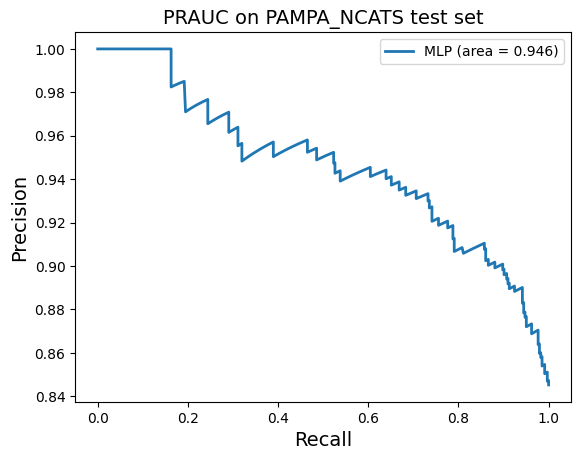

Found local copy...
Loading...
Done!




 ============================== AttentiveFP ==============================
The 2th run
collect data for:  ['PAMPA_NCATS']
--> preparing data loader for model type  AttentiveFP
Processing dgl graphs from scratch...


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 337 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 407 out of 407 | elapsed:    3.9s finished


Model type:  AttentiveFP | Model parameters:  3823507
finish load data status 

load pretrained model from  ST/PAMPA_NCATS/AttentiveFP_ST_2.pt
[Test] Loss: 0.380
*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.850  &0.581  &0.868  &0.971  &0.190  &0.916 &0.740 &0.258 &0.933


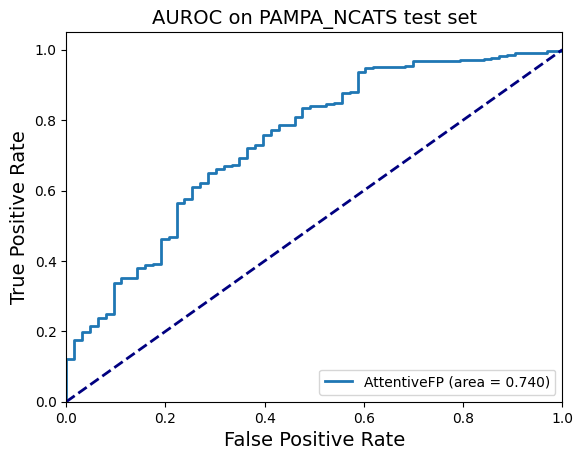

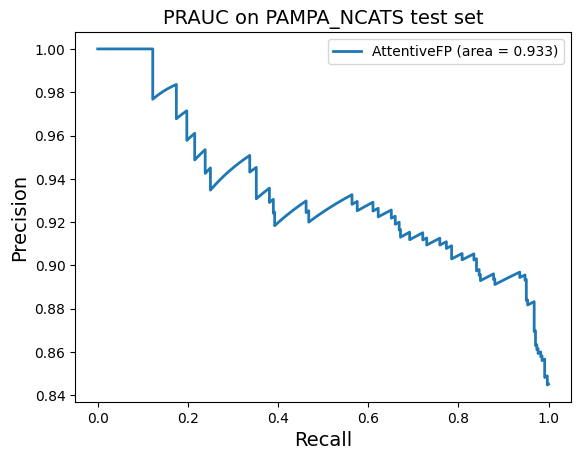

Found local copy...
Loading...
Done!




 ============================== GIN ==============================
The 2th run
collect data for:  ['PAMPA_NCATS']
--> preparing data loader for model type  GIN


gin_supervised_contextpred_pre_trained.pth: 100%|██████████| 7.45M/7.45M [00:00<00:00, 67.0MB/s]


Pretrained model loaded
Model type:  GIN | Model parameters:  1978733
finish load data status 

load pretrained model from  ST/PAMPA_NCATS/GIN_ST_2.pt
[Test] Loss: 0.343
*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.867  &0.636  &0.884  &0.971  &0.302  &0.925 &0.782 &0.383 &0.944


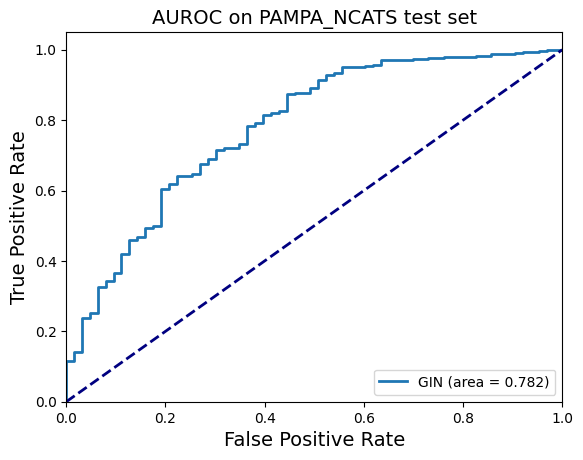

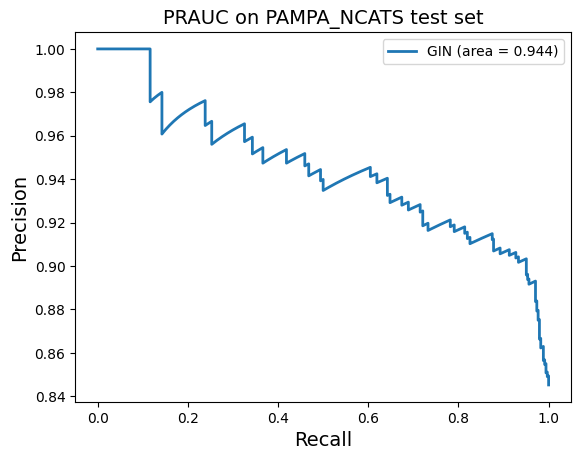

Found local copy...
Loading...
Done!




 ============================== RNN ==============================
The 2th run
collect data for:  ['PAMPA_NCATS']
--> preparing data loader for model type  RNN
Model type:  RNN | Model parameters:  2980741
finish load data status 

load pretrained model from  ST/PAMPA_NCATS/RNN_ST_2.pt
[Test] Loss: 0.438
*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.845  &0.500  &0.845  &1.000  &0.000  &0.916 &0.523 &  nan &0.835


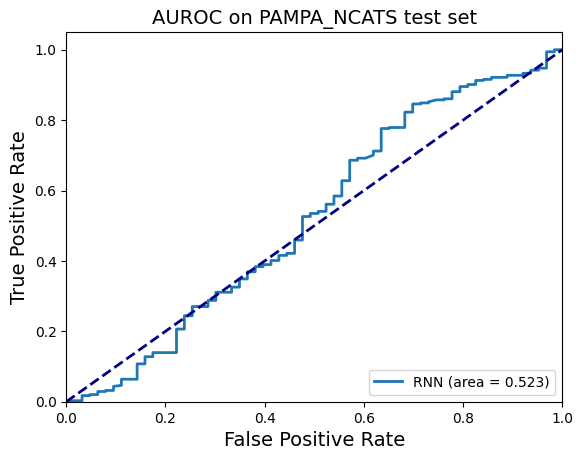

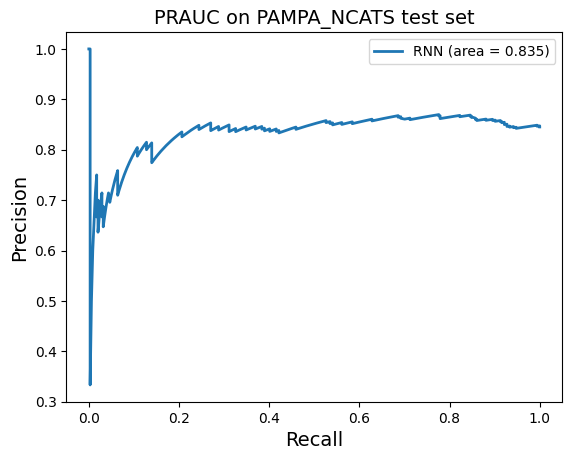

Found local copy...
Loading...
Done!



Evaluating  Lipophilicity_AstraZeneca

 ============================== MLP ==============================
The 0th run
collect data for:  ['Lipophilicity_AstraZeneca']

START scaling train valid test data set: 
---> scale Lipophilicity_AstraZeneca | min -1.500 | max 4.500
Finished scaling process | dict_scale: {'Lipophilicity_AstraZeneca': [-1.5, 4.5]} 

--> preparing data loader for model type  MLP
---> converting SMILES to MACCS...
---> FINISHED
Model type:  MLP | Model parameters:  32385
finish load data status 

load pretrained model from  ST/Lipophilicity_AstraZeneca/MLP_ST_0.pt
[Test] Loss: 0.021
*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.636  &0.731  &0.855  &0.505


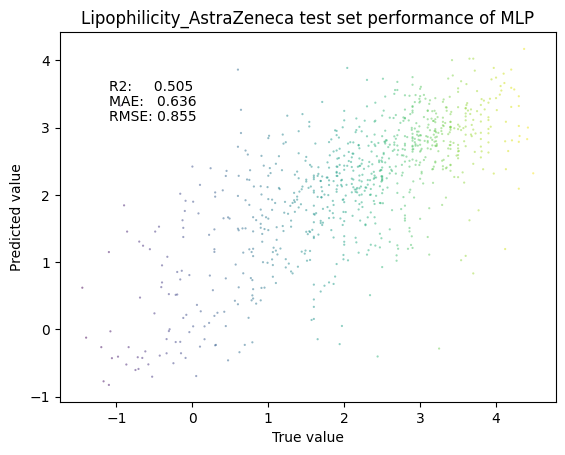

Found local copy...
Loading...
Done!




 ============================== AttentiveFP ==============================
The 1th run
collect data for:  ['Lipophilicity_AstraZeneca']

START scaling train valid test data set: 
---> scale Lipophilicity_AstraZeneca | min -1.500 | max 4.500
Finished scaling process | dict_scale: {'Lipophilicity_AstraZeneca': [-1.5, 4.5]} 

--> preparing data loader for model type  AttentiveFP
Processing dgl graphs from scratch...


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 806 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 840 out of 840 | elapsed:    1.4s finished


Model type:  AttentiveFP | Model parameters:  3823507
finish load data status 

load pretrained model from  ST/Lipophilicity_AstraZeneca/AttentiveFP_ST_1.pt
[Test] Loss: 0.009
*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.415  &0.334  &0.578  &0.774


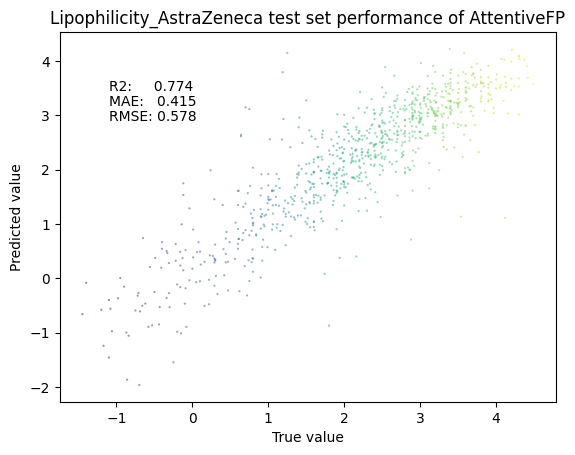

Found local copy...
Loading...
Done!




 ============================== GIN ==============================
The 2th run
collect data for:  ['Lipophilicity_AstraZeneca']

START scaling train valid test data set: 
---> scale Lipophilicity_AstraZeneca | min -1.500 | max 4.500
Finished scaling process | dict_scale: {'Lipophilicity_AstraZeneca': [-1.5, 4.5]} 

--> preparing data loader for model type  GIN


gin_supervised_contextpred_pre_trained.pth: 100%|██████████| 7.45M/7.45M [00:00<00:00, 68.2MB/s]


Pretrained model loaded
Model type:  GIN | Model parameters:  1978733
finish load data status 

load pretrained model from  ST/Lipophilicity_AstraZeneca/GIN_ST_2.pt
[Test] Loss: 0.012
*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.504  &0.440  &0.663  &0.702


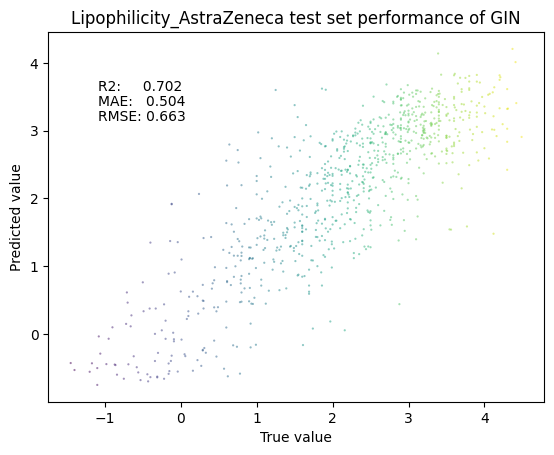

Found local copy...
Loading...
Done!




 ============================== RNN ==============================
The 2th run
collect data for:  ['Lipophilicity_AstraZeneca']

START scaling train valid test data set: 
---> scale Lipophilicity_AstraZeneca | min -1.500 | max 4.500
Finished scaling process | dict_scale: {'Lipophilicity_AstraZeneca': [-1.5, 4.5]} 

--> preparing data loader for model type  RNN
Model type:  RNN | Model parameters:  2980741
finish load data status 

load pretrained model from  ST/Lipophilicity_AstraZeneca/RNN_ST_2.pt
[Test] Loss: 0.018
*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.607  &0.638  &0.799  &0.568


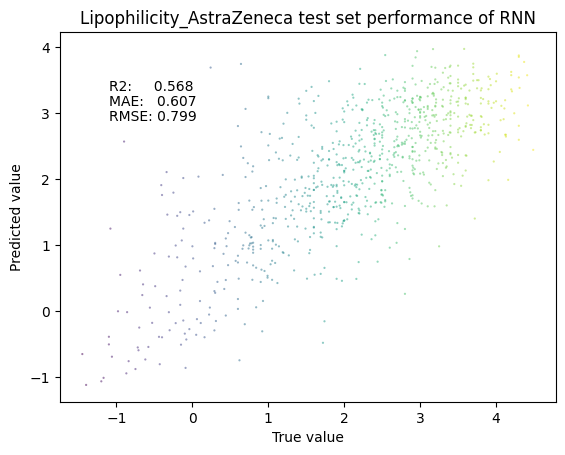

Found local copy...
Loading...
Done!



Evaluating  Solubility_AqSolDB

 ============================== MLP ==============================
The 1th run
collect data for:  ['Solubility_AqSolDB']

START scaling train valid test data set: 
---> scale Solubility_AqSolDB | min -13.172 | max 2.138
Finished scaling process | dict_scale: {'Solubility_AqSolDB': [-13.1719, 2.1376816201]} 

--> preparing data loader for model type  MLP
---> converting SMILES to MACCS...
---> FINISHED
Model type:  MLP | Model parameters:  32385
finish load data status 

load pretrained model from  ST/Solubility_AqSolDB/MLP_ST_1.pt
[Test] Loss: 0.007
*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.918  &1.621  &1.273  &0.701


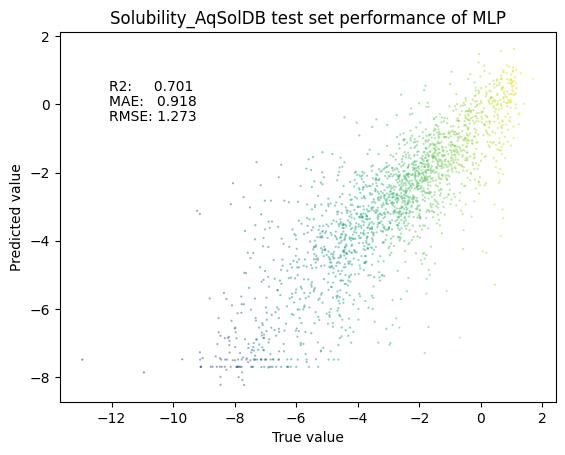

Found local copy...
Loading...
Done!




 ============================== AttentiveFP ==============================
The 1th run
collect data for:  ['Solubility_AqSolDB']

START scaling train valid test data set: 
---> scale Solubility_AqSolDB | min -13.172 | max 2.138
Finished scaling process | dict_scale: {'Solubility_AqSolDB': [-13.1719, 2.1376816201]} 

--> preparing data loader for model type  AttentiveFP
Processing dgl graphs from scratch...


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 1660 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 1996 out of 1996 | elapsed:    2.4s finished


Model type:  AttentiveFP | Model parameters:  3823507
finish load data status 

load pretrained model from  ST/Solubility_AqSolDB/AttentiveFP_ST_1.pt
[Test] Loss: 0.004
*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.683  &0.991  &0.996  &0.817


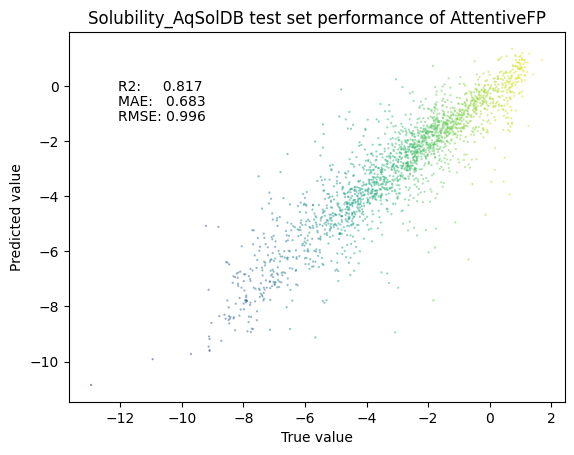

Found local copy...
Loading...
Done!




 ============================== GIN ==============================
The 2th run
collect data for:  ['Solubility_AqSolDB']

START scaling train valid test data set: 
---> scale Solubility_AqSolDB | min -13.172 | max 2.138
Finished scaling process | dict_scale: {'Solubility_AqSolDB': [-13.1719, 2.1376816201]} 

--> preparing data loader for model type  GIN


gin_supervised_contextpred_pre_trained.pth: 100%|██████████| 7.45M/7.45M [00:00<00:00, 61.9MB/s]


Pretrained model loaded
Model type:  GIN | Model parameters:  1978733
finish load data status 

load pretrained model from  ST/Solubility_AqSolDB/GIN_ST_2.pt
[Test] Loss: 0.005
*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.773  &1.212  &1.101  &0.777


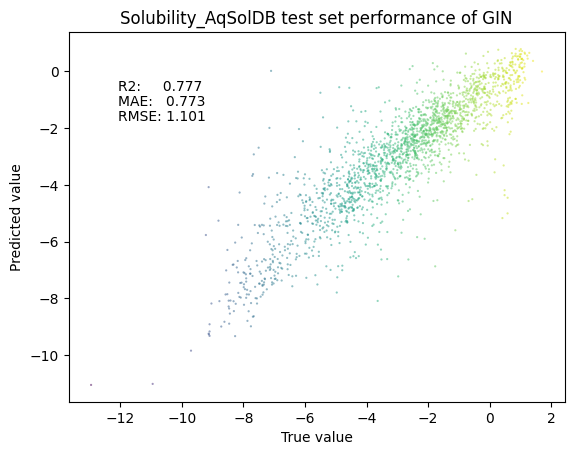

Found local copy...
Loading...
Done!




 ============================== RNN ==============================
The 1th run
collect data for:  ['Solubility_AqSolDB']

START scaling train valid test data set: 
---> scale Solubility_AqSolDB | min -13.172 | max 2.138
Finished scaling process | dict_scale: {'Solubility_AqSolDB': [-13.1719, 2.1376816201]} 

--> preparing data loader for model type  RNN
Model type:  RNN | Model parameters:  2980741
finish load data status 

load pretrained model from  ST/Solubility_AqSolDB/RNN_ST_1.pt
[Test] Loss: 0.005
*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.757  &1.155  &1.075  &0.787


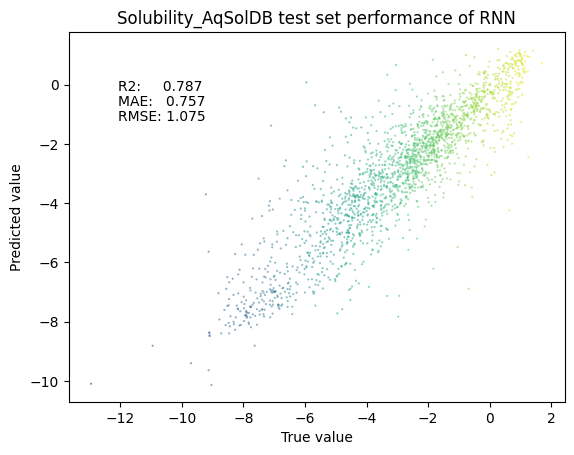

In [13]:
print('Best model performance among each algorithm, generate figures\n')
for name in names_A3:
    print('Evaluating ', name)
    folder_name = f'ST/{name}/'
    model_dict = best_model_dict[name]
    for model_type, best_idx in model_dict.items():
        # print(i, j)
        print('\n', '='*30, model_type, '='*30)
        print(f'The {best_idx}th run')
        file_name = folder_name + model_type + '_ST_' + str(best_idx) + '.yml'
        p = yml_report(file_name, recalculate=True)

# Multi task, trained together 3 tasks, with uncertainty weight

In [17]:
print('multi task evaluation on different models, with uncertainty weight\n')
best_model_dict = {}
for name in names_A3:
    model_dict = {}
    print('Evaluating ', name)
    folder_name = f'A3/uw/'
    for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
        print('\n', '='*30, model_type, '='*30)
        perfs = []
        for i in range(3):
            file_name = folder_name + model_type + '_MT_' + str(i) + '.yml'
            p = yml_report(file_name, recalculate=False)
            perfs.append(p)
        best_idx = eval_perf_list(perfs, name)
        model_dict[model_type] = best_idx
    best_model_dict[name] = model_dict
    print('\n\n')

multi task evaluation on different models, with uncertainty weight

Evaluating  PAMPA_NCATS

 ============================== MLP ==============================
repeated num # 3 idx 1 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       auc      |       ap      
	&0.845$\pm$0.000  &0.787$\pm$0.002  &0.943$\pm$0.002  
 idx 1: &0.845            &0.785            &0.945            


 ============================== AttentiveFP ==============================
repeated num # 3 idx 1 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       auc      |       ap      
	&0.875$\pm$0.004  &0.796$\pm$0.011  &0.951$\pm$0.004  
 idx 1: &0.880            &0.812            &0.957            


 ============================== GIN ==============================
repeated num # 3 idx 1 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       auc      |       ap      
	&0.87

In [19]:
folder_name = 'A3/uw/'
print('MUE')
for name in names_A3:
    print('Evaluating ', name)
    perfs = []
    for i in range(3):
        file_name = folder_name + 'MUE' + '_'+ name + '_' + str(i) + '.yml'
        p = yml_report(file_name, recalculate=False)
        perfs.append(p)
    eval_perf_list(perfs, name)


MUE
Evaluating  PAMPA_NCATS
repeated num # 3 idx 1 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       auc      |       ap      
	&0.883$\pm$0.001  &0.822$\pm$0.004  &0.955$\pm$0.002  
 idx 1: &0.885            &0.821            &0.954            

Evaluating  Lipophilicity_AstraZeneca
repeated num # 3 idx 2 has the lowest loss
******************** Lipophilicity_AstraZeneca ******************** 
	|       mae      |       rmse      |       r2      
	&0.471$\pm$0.010  &0.627$\pm$0.015  &0.734$\pm$0.013  
 idx 2: &0.462            &0.612            &0.747            

Evaluating  Solubility_AqSolDB
repeated num # 3 idx 1 has the lowest loss
******************** Solubility_AqSolDB ******************** 
	|       mae      |       rmse      |       r2      
	&0.686$\pm$0.007  &0.968$\pm$0.008  &0.827$\pm$0.003  
 idx 1: &0.688            &0.965            &0.829            



In [20]:
names_A3

['PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']

In [ ]:
for model_type in['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    p = train_mt(names_A3, model_type, 'A3/uw_no', repeat_time=3, retrain=False, uw=False)

Epoch:29 [Train] Loss: 0.133 | [Valid] Loss: 0.141	EarlyStopping counter: 3 out of 30
Epoch:30 [Train] Loss: 0.130 | [Valid] Loss: 0.144	EarlyStopping counter: 4 out of 30
Epoch:31 [Train] Loss: 0.131 | [Valid] Loss: 0.139	EarlyStopping counter: 5 out of 30
Epoch:32 [Train] Loss: 0.129 | [Valid] Loss: 0.135	SAVE MODEL: loss: 0.136 -> 0.135 | runtime: 0.177 ms
Epoch:33 [Train] Loss: 0.128 | [Valid] Loss: 0.135	SAVE MODEL: loss: 0.135 -> 0.135 | runtime: 0.174 ms
Epoch:34 [Train] Loss: 0.130 | [Valid] Loss: 0.146	EarlyStopping counter: 1 out of 30
Epoch:35 [Train] Loss: 0.130 | [Valid] Loss: 0.141	EarlyStopping counter: 2 out of 30
Epoch:36 [Train] Loss: 0.127 | [Valid] Loss: 0.139	EarlyStopping counter: 3 out of 30
Epoch:37 [Train] Loss: 0.123 | [Valid] Loss: 0.139	EarlyStopping counter: 4 out of 30
Epoch:38 [Train] Loss: 0.125 | [Valid] Loss: 0.135	EarlyStopping counter: 5 out of 30
Epoch:39 [Train] Loss: 0.122 | [Valid] Loss: 0.133	SAVE MODEL: loss: 0.135 -> 0.133 | runtime: 0.203 ms
